# Generative models

Grzegorz Statkiewicz, Mateusz Matukiewicz

## Setup

In [1]:
import torch

Select the device to use

In [2]:
device = torch.device("cuda:2") if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Using device: {device}")

Using device: mps


## Prepare the dataset

Load the dataset. The data should be placed in the `./data` directory with the following structure:

```
data
├── 00000
│   ├── 00000_0000.jpg
│       ├── 00000_0000.jpg
|   ├── 00000_00001
│       ├── 00000_0001.jpg
```

In [3]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

images = ImageFolder("data/", transform=transform)
images_count = len(images)

print(f"Number of images: {images_count}")

Number of images: 39209


Train-test split

In [13]:
from torch.utils.data import random_split

test_size = 0.2

max_train_count = None
train_count = min(int(images_count * (1 - test_size)), max_train_count if max_train_count else float('inf'))
test_count = images_count - train_count

train_ds, test_ds = random_split(images, [train_count, test_count])

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)

print(f"Number of training images: {len(train_dl.dataset)}")
print(f"Number of test images: {len(test_dl.dataset)}")

Number of training images: 31367
Number of test images: 7842


Show samples

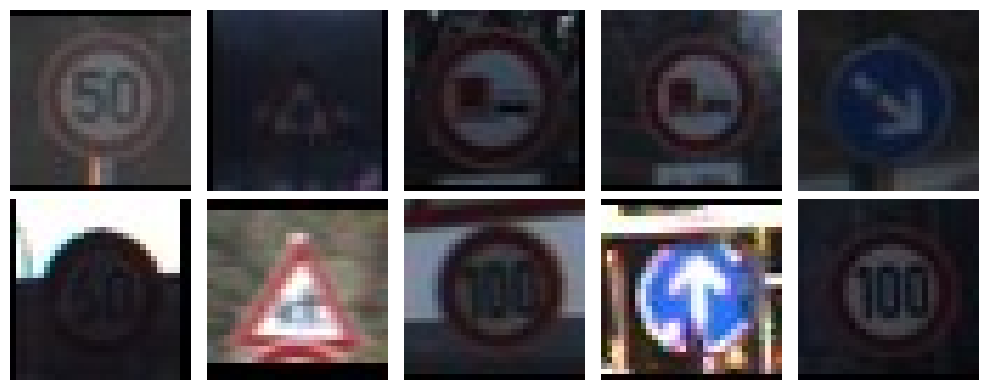

In [5]:
from utils import denormalize_batch
from display import plot_images
import random

idxs = random.sample(range(images_count), 10)
samples = [images[i][0] for i in idxs]

# Denormalize the images
batch = torch.stack(samples)
batch = denormalize_batch(batch, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
batch = batch.clamp(0, 1)

plot_images(list(batch))

## Create the model

In [6]:
from gnn import Generator, Discriminator
import torch.optim as optim
import torch.nn as nn

# Models
latent_dim = 100

generator = Generator(latent_dim=latent_dim).to(device)
discriminator = Discriminator().to(device)

## Train the model

Setup the parameters

In [7]:
# Optimizers
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
discriminator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=discriminator_optimizer, gamma=0.99)

# loss
criterion = nn.MSELoss()

Perform training

Epoch: 0, discrimiantor fake error: 0.0305, discriminator real acc: 0.972


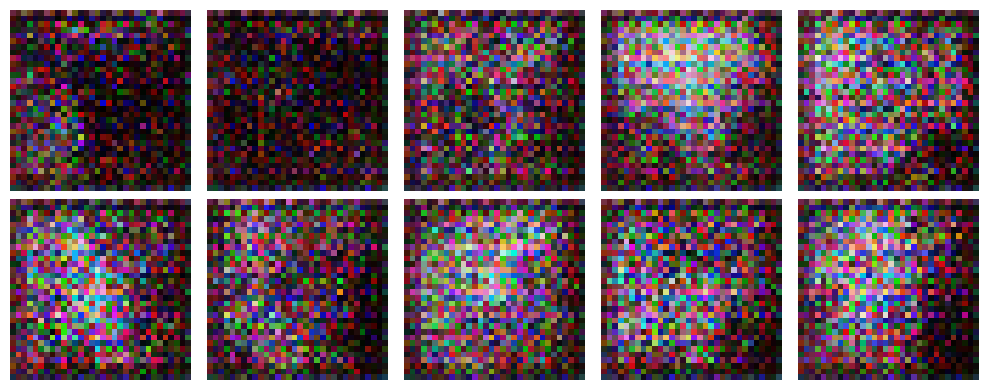

Epoch: 1, discrimiantor fake error: 0.071, discriminator real acc: 0.927
Epoch: 2, discrimiantor fake error: 0.0537, discriminator real acc: 0.942
Epoch: 3, discrimiantor fake error: 0.0481, discriminator real acc: 0.953
Epoch: 4, discrimiantor fake error: 0.0571, discriminator real acc: 0.939
Epoch: 5, discrimiantor fake error: 0.0669, discriminator real acc: 0.933
Epoch: 6, discrimiantor fake error: 0.0706, discriminator real acc: 0.928
Epoch: 7, discrimiantor fake error: 0.0848, discriminator real acc: 0.915
Epoch: 8, discrimiantor fake error: 0.086, discriminator real acc: 0.913
Epoch: 9, discrimiantor fake error: 0.0887, discriminator real acc: 0.91
Epoch: 10, discrimiantor fake error: 0.104, discriminator real acc: 0.895


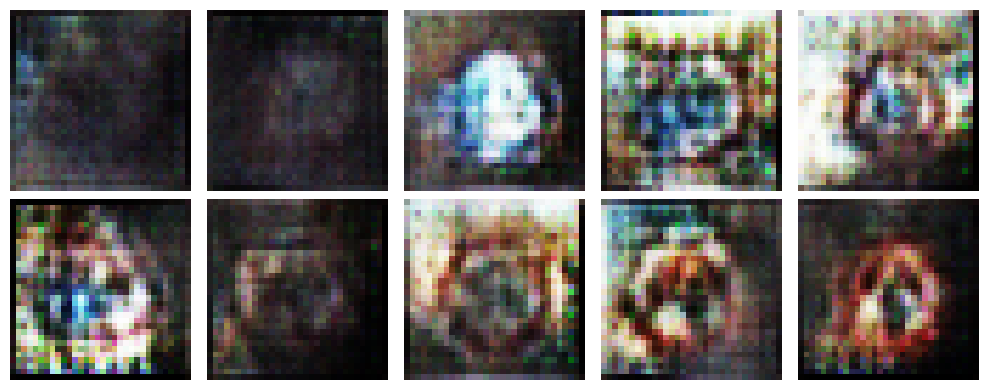

Epoch: 11, discrimiantor fake error: 0.11, discriminator real acc: 0.888
Epoch: 12, discrimiantor fake error: 0.113, discriminator real acc: 0.884
Epoch: 13, discrimiantor fake error: 0.106, discriminator real acc: 0.893
Epoch: 14, discrimiantor fake error: 0.104, discriminator real acc: 0.894
Epoch: 15, discrimiantor fake error: 0.102, discriminator real acc: 0.898
Epoch: 16, discrimiantor fake error: 0.0982, discriminator real acc: 0.9
Epoch: 17, discrimiantor fake error: 0.1, discriminator real acc: 0.901
Epoch: 18, discrimiantor fake error: 0.0919, discriminator real acc: 0.906
Epoch: 19, discrimiantor fake error: 0.0943, discriminator real acc: 0.907
Epoch: 20, discrimiantor fake error: 0.0852, discriminator real acc: 0.911


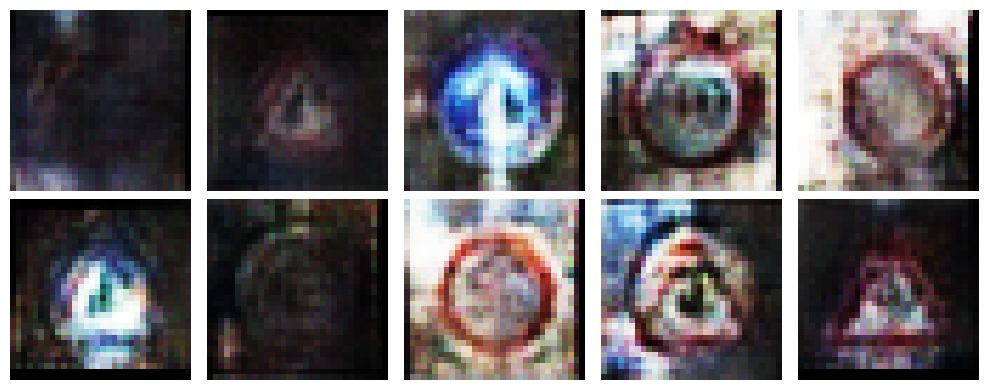

Epoch: 21, discrimiantor fake error: 0.0827, discriminator real acc: 0.918
Epoch: 22, discrimiantor fake error: 0.0849, discriminator real acc: 0.913
Epoch: 23, discrimiantor fake error: 0.0807, discriminator real acc: 0.921
Epoch: 24, discrimiantor fake error: 0.0791, discriminator real acc: 0.92
Epoch: 25, discrimiantor fake error: 0.0736, discriminator real acc: 0.925
Epoch: 26, discrimiantor fake error: 0.0718, discriminator real acc: 0.927
Epoch: 27, discrimiantor fake error: 0.0717, discriminator real acc: 0.928
Epoch: 28, discrimiantor fake error: 0.0763, discriminator real acc: 0.923
Epoch: 29, discrimiantor fake error: 0.0647, discriminator real acc: 0.934
Epoch: 30, discrimiantor fake error: 0.0682, discriminator real acc: 0.933


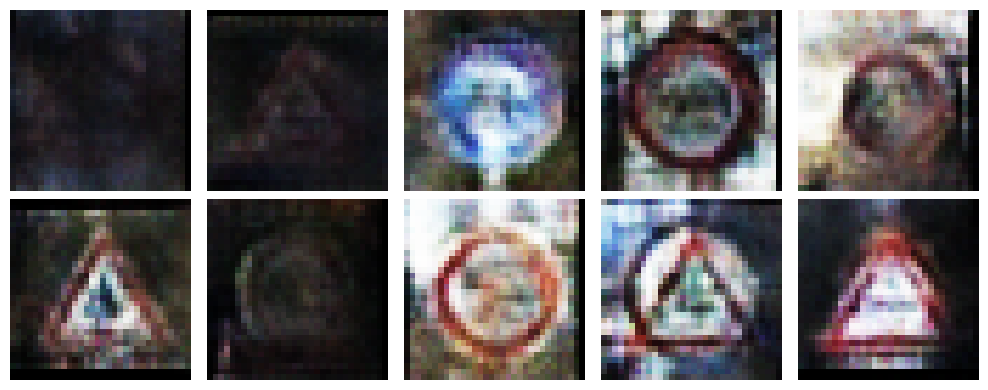

Epoch: 31, discrimiantor fake error: 0.0642, discriminator real acc: 0.933
Epoch: 32, discrimiantor fake error: 0.0698, discriminator real acc: 0.933
Epoch: 33, discrimiantor fake error: 0.0608, discriminator real acc: 0.938
Epoch: 34, discrimiantor fake error: 0.0642, discriminator real acc: 0.935
Epoch: 35, discrimiantor fake error: 0.0588, discriminator real acc: 0.944
Epoch: 36, discrimiantor fake error: 0.0618, discriminator real acc: 0.935
Epoch: 37, discrimiantor fake error: 0.0589, discriminator real acc: 0.94
Epoch: 38, discrimiantor fake error: 0.0612, discriminator real acc: 0.94
Epoch: 39, discrimiantor fake error: 0.0589, discriminator real acc: 0.941
Epoch: 40, discrimiantor fake error: 0.056, discriminator real acc: 0.942


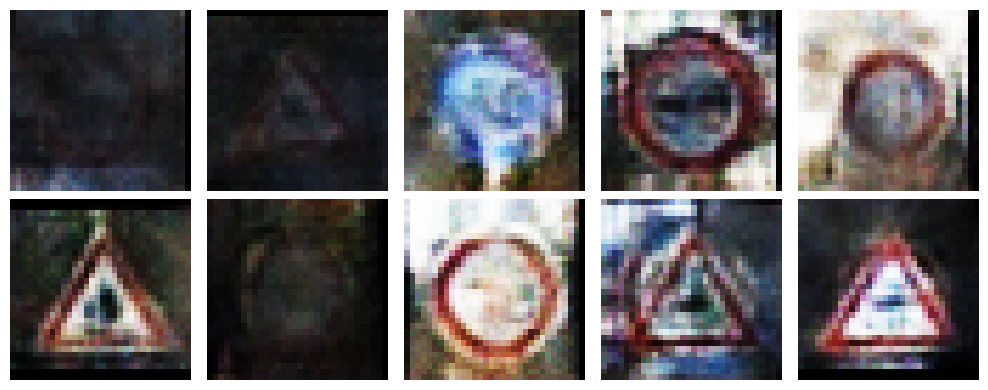

Epoch: 41, discrimiantor fake error: 0.0591, discriminator real acc: 0.942
Epoch: 42, discrimiantor fake error: 0.0572, discriminator real acc: 0.942
Epoch: 43, discrimiantor fake error: 0.0529, discriminator real acc: 0.947
Epoch: 44, discrimiantor fake error: 0.0563, discriminator real acc: 0.943
Epoch: 45, discrimiantor fake error: 0.0521, discriminator real acc: 0.946
Epoch: 46, discrimiantor fake error: 0.0552, discriminator real acc: 0.948
Epoch: 47, discrimiantor fake error: 0.0516, discriminator real acc: 0.946
Epoch: 48, discrimiantor fake error: 0.0522, discriminator real acc: 0.948
Epoch: 49, discrimiantor fake error: 0.0463, discriminator real acc: 0.954
Epoch: 50, discrimiantor fake error: 0.0522, discriminator real acc: 0.948


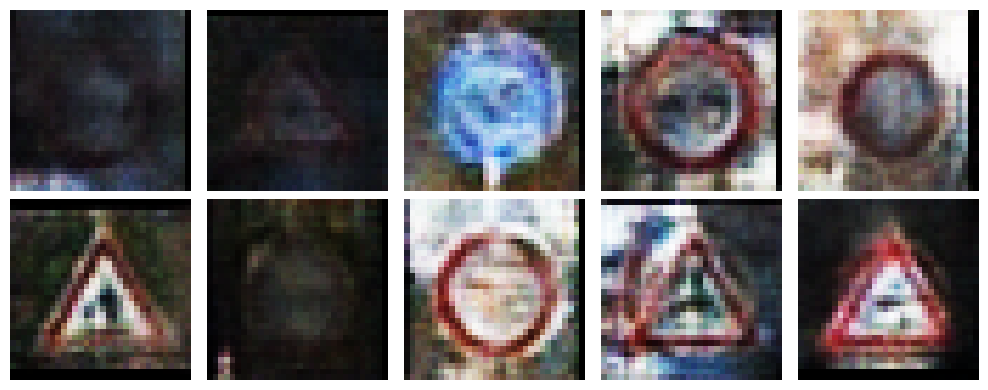

Epoch: 51, discrimiantor fake error: 0.0456, discriminator real acc: 0.954
Epoch: 52, discrimiantor fake error: 0.0438, discriminator real acc: 0.956
Epoch: 53, discrimiantor fake error: 0.0513, discriminator real acc: 0.949
Epoch: 54, discrimiantor fake error: 0.0474, discriminator real acc: 0.952
Epoch: 55, discrimiantor fake error: 0.0436, discriminator real acc: 0.957
Epoch: 56, discrimiantor fake error: 0.0442, discriminator real acc: 0.955
Epoch: 57, discrimiantor fake error: 0.0445, discriminator real acc: 0.955
Epoch: 58, discrimiantor fake error: 0.0406, discriminator real acc: 0.96
Epoch: 59, discrimiantor fake error: 0.0398, discriminator real acc: 0.96
Epoch: 60, discrimiantor fake error: 0.0404, discriminator real acc: 0.961


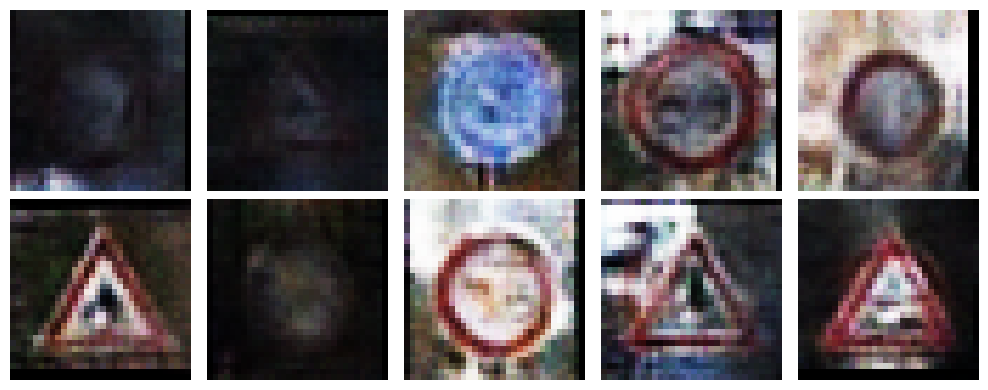

Epoch: 61, discrimiantor fake error: 0.0376, discriminator real acc: 0.961
Epoch: 62, discrimiantor fake error: 0.0425, discriminator real acc: 0.958
Epoch: 63, discrimiantor fake error: 0.0456, discriminator real acc: 0.956
Epoch: 64, discrimiantor fake error: 0.0438, discriminator real acc: 0.955
Epoch: 65, discrimiantor fake error: 0.0429, discriminator real acc: 0.957
Epoch: 66, discrimiantor fake error: 0.0393, discriminator real acc: 0.96
Epoch: 67, discrimiantor fake error: 0.0382, discriminator real acc: 0.962
Epoch: 68, discrimiantor fake error: 0.0394, discriminator real acc: 0.962
Epoch: 69, discrimiantor fake error: 0.0366, discriminator real acc: 0.963
Epoch: 70, discrimiantor fake error: 0.0391, discriminator real acc: 0.961


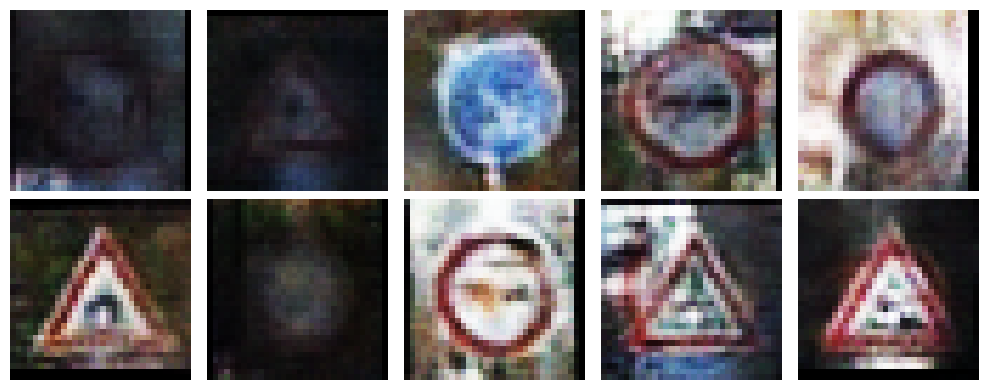

Epoch: 71, discrimiantor fake error: 0.0368, discriminator real acc: 0.962
Epoch: 72, discrimiantor fake error: 0.038, discriminator real acc: 0.963
Epoch: 73, discrimiantor fake error: 0.0401, discriminator real acc: 0.961
Epoch: 74, discrimiantor fake error: 0.0374, discriminator real acc: 0.961
Epoch: 75, discrimiantor fake error: 0.0387, discriminator real acc: 0.962
Epoch: 76, discrimiantor fake error: 0.0378, discriminator real acc: 0.961
Epoch: 77, discrimiantor fake error: 0.0357, discriminator real acc: 0.964
Epoch: 78, discrimiantor fake error: 0.0337, discriminator real acc: 0.965
Epoch: 79, discrimiantor fake error: 0.034, discriminator real acc: 0.967
Epoch: 80, discrimiantor fake error: 0.0355, discriminator real acc: 0.965


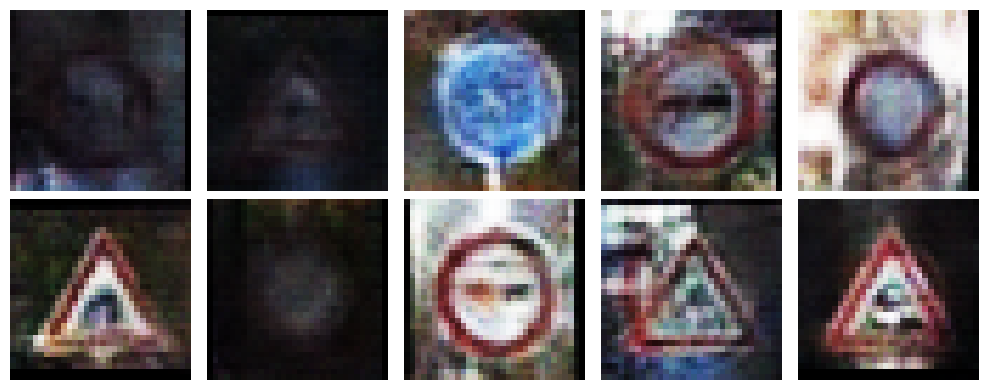

Epoch: 81, discrimiantor fake error: 0.0331, discriminator real acc: 0.968
Epoch: 82, discrimiantor fake error: 0.0344, discriminator real acc: 0.966
Epoch: 83, discrimiantor fake error: 0.0317, discriminator real acc: 0.967
Epoch: 84, discrimiantor fake error: 0.0357, discriminator real acc: 0.966
Epoch: 85, discrimiantor fake error: 0.0314, discriminator real acc: 0.969
Epoch: 86, discrimiantor fake error: 0.0315, discriminator real acc: 0.967
Epoch: 87, discrimiantor fake error: 0.0301, discriminator real acc: 0.969
Epoch: 88, discrimiantor fake error: 0.0352, discriminator real acc: 0.964
Epoch: 89, discrimiantor fake error: 0.0338, discriminator real acc: 0.968
Epoch: 90, discrimiantor fake error: 0.0347, discriminator real acc: 0.965


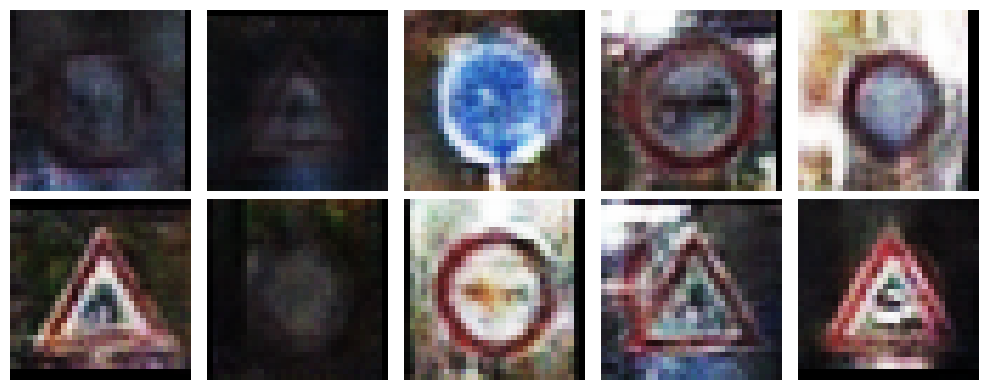

Epoch: 91, discrimiantor fake error: 0.0315, discriminator real acc: 0.967
Epoch: 92, discrimiantor fake error: 0.0342, discriminator real acc: 0.968
Epoch: 93, discrimiantor fake error: 0.0271, discriminator real acc: 0.971
Epoch: 94, discrimiantor fake error: 0.0298, discriminator real acc: 0.971
Epoch: 95, discrimiantor fake error: 0.0303, discriminator real acc: 0.969
Epoch: 96, discrimiantor fake error: 0.0275, discriminator real acc: 0.972
Epoch: 97, discrimiantor fake error: 0.0283, discriminator real acc: 0.972
Epoch: 98, discrimiantor fake error: 0.031, discriminator real acc: 0.969
Epoch: 99, discrimiantor fake error: 0.0265, discriminator real acc: 0.972


In [8]:
from gnn import Trainer as GNNTrainer

gnn_trainer = GNNTrainer(criterion=criterion, latent_dim=latent_dim, device=device)
gnn_trainer.set_generator(generator, generator_optimizer, generator_scheduler)
gnn_trainer.set_discriminator(discriminator, discriminator_optimizer, discriminator_scheduler)

# Training
gnn_trainer.fit(train_dl, num_epochs=100)